In [1]:
from autoencoder import *

In [2]:
theta = np.linspace(-np.pi,0.0*np.pi,500, dtype=np.float32)
data = np.vstack([np.cos(theta), np.sin(theta)]).T
dataset = tf.data.Dataset.from_tensor_slices(data)

In [3]:
graph = tf.Graph()
with graph.as_default():
    tr_x = atu.make_datastream(dataset)
    au = PolyAutoencoder(2,1,tr_x, 5,5)
    init=tf.global_variables_initializer()

In [4]:
try:
    sess.close()
except:
    pass
sess = tf.InteractiveSession(graph=graph)
init.run(session=sess)

In [5]:
for i in xrange(10000):
    #train_step.run(session=sess)
    sess.run(au.train_step)
    if i%1000==99:
        print au.goal.eval(session=sess)

2.4471502
0.012592802
0.0098305615
0.0067316685
0.0031823406
0.0031738456
0.0019533066
0.0496156
0.0009881195
0.012240151


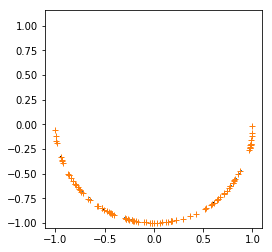

In [137]:
au.plot_distance()

In [7]:
with graph.as_default():
    # The mass matrix
    momentum = tf.constant(0.5)*tf.reduce_sum( tf.pow( au.o_x , 2 ) )
    o_M = tf.hessians( momentum, au.i_q )[0]
    o_U = au.o_x[:,1]
    o_gradU = tf.gradients( o_U, au.i_q)[0]
    o_gradX = tf.gradients(au.o_x, au.i_q)[0]

In [10]:
i_q0 = tf.placeholder(shape=(None,au.size_q),dtype=tf.float32)
i_v0 = tf.placeholder(shape=(None,au.size_q),dtype=tf.float32)
i_qi = tf.placeholder(shape=(None,au.size_q),dtype=tf.float32)
i_vi = tf.placeholder(shape=(None,au.size_q),dtype=tf.float32)
Dt = tf.constant(0.01)
g = tf.constant(9.81)

In [146]:
def L(i_q,i_v):
    x = au.decode(i_q)
    dxdq = atu.vector_gradient(x,i_q)
    v = tf.einsum("ijk,ij->ik",dxdq,i_v)
    L = 0.5*tf.einsum("ij,ij->i",v,v) - g*x[:,1]
    return x,v, tf.expand_dims(L,-1)

In [147]:
o_x,o_v,Li = L(i_qi,i_vi)
dLi_dv = atu.vector_gradient(Li,i_vi)
dLi_dq = atu.vector_gradient(Li,i_qi)
_,_,L0 = L(i_q0,i_v0)
dL0_dv = atu.vector_gradient(L0,i_v0)
dL0_dq = atu.vector_gradient(L0,i_q0)


In [148]:
lhs = dLi_dv - Dt * dLi_dq
rhs = dL0_dv
KV = atu.vector_gradient(lhs,i_vi)
KQ = atu.vector_gradient(lhs,i_qi)
Ktot = Dt*KQ + KV

In [149]:
q_i = np.array([[0.0]])
v_i = np.array([[0.0]])
q_0 = np.array([[0.0]])
v_0 = np.array([[0.0]])
ev = lambda x : sess.run(x,feed_dict
        ={i_qi:q_i,i_q0:q_0, i_vi:v_i,})

In [150]:
print ev(o_x), ev(o_v)

[[ 0.74982995 -0.6582096 ]] [[0. 0.]]


In [ ]:
print ev(KV), ev(KQ), ev(Ktot)

In [159]:
q_0[:] = 0
q_i[:] = 0
v_0[:] = 0
v_i[:] = 0
series_q, series_vq = [],[]
series_x, series_v = [], []
for it in range(100):
    rhs_0 = ev(rhs)
    for k in range(10):
        K_k,lhs_k= ev(Ktot), ev(lhs)
        R = rhs_0 - lhs_k
        Dv = np.linalg.solve(K_k[0,:,:], R[0,:])
        v_i[:] += Dv
        q_i[:] += ev(Dt)*Dv
        n = np.linalg.norm(Dv)
        if n<1.0e-7: break
#     print n
    v_0[:] = v_i[:]
    q_0[:] = q_i[:]
    print q_0
    series_q.append(q_0[0,0])
    series_vq.append(v_0[0,0])
    series_x.append(ev(o_x)[0,:])
    series_v.append(ev(o_v)[0,:])
series_x = np.array(series_x)
series_v = np.array(series_v)
series_q = np.array(series_q)
series_vq = np.array(series_vq)


[[-0.0007423]]
[[-0.00148417]]
[[-0.00222594]]
[[-0.00296793]]
[[-0.00371048]]
[[-0.00445395]]
[[-0.00519867]]
[[-0.00594501]]
[[-0.00669333]]
[[-0.00744399]]
[[-0.00819738]]
[[-0.00895389]]
[[-0.00971392]]
[[-0.01047789]]
[[-0.01124621]]
[[-0.01201932]]
[[-0.01279769]]
[[-0.01358177]]
[[-0.01437207]]
[[-0.01516909]]
[[-0.01597336]]
[[-0.01678543]]
[[-0.01760588]]
[[-0.01843531]]
[[-0.01927436]]
[[-0.02012369]]
[[-0.02098402]]
[[-0.02185606]]
[[-0.02274061]]
[[-0.02363849]]
[[-0.02455057]]
[[-0.02547777]]
[[-0.0264211]]
[[-0.02738159]]
[[-0.02836037]]
[[-0.02935862]]
[[-0.03037763]]
[[-0.03141878]]
[[-0.03248355]]
[[-0.03357351]]
[[-0.03469039]]
[[-0.03583604]]
[[-0.03701246]]
[[-0.03822185]]
[[-0.03946656]]
[[-0.0407492]]
[[-0.04207261]]
[[-0.04343987]]
[[-0.0448544]]
[[-0.04632]]
[[-0.04784077]]
[[-0.04942136]]
[[-0.05106691]]
[[-0.05278312]]
[[-0.05457647]]
[[-0.05645414]]
[[-0.05842431]]
[[-0.06049624]]
[[-0.0626805]]
[[-0.06498917]]
[[-0.06743618]]
[[-0.07003771]]
[[-0.07281257]]


In [160]:
from matplotlib import pylab as plt
%matplotlib inline

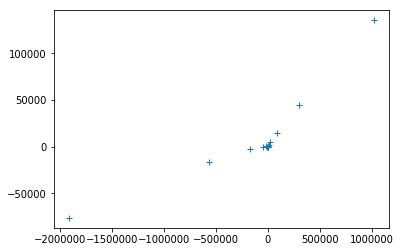

In [161]:
plt.plot(series_x[:,0],series_x[:,1], '+')

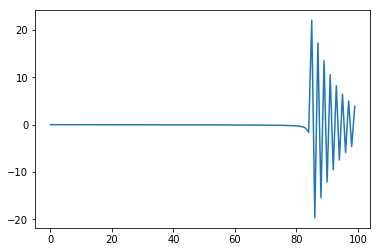

In [163]:
plt.plot(series_q)

In [164]:
au.o_q.eval(feed_dict={au.i_x:np.array([[0.0,-1.0]])})

array([[-0.6723844]], dtype=float32)